<a href="https://colab.research.google.com/github/Raksh-iscool/Tasks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
X_std = StandardScaler().fit_transform(X)


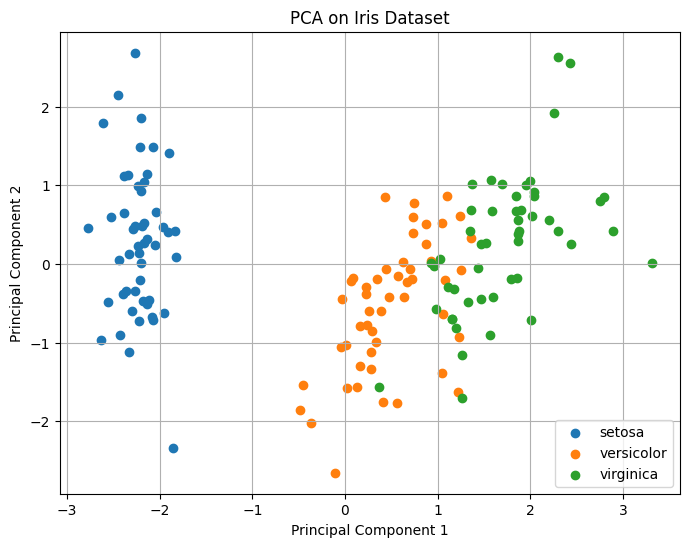

In [2]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Visualize PCA result
plt.figure(figsize=(8,6))
for i, name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=name)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


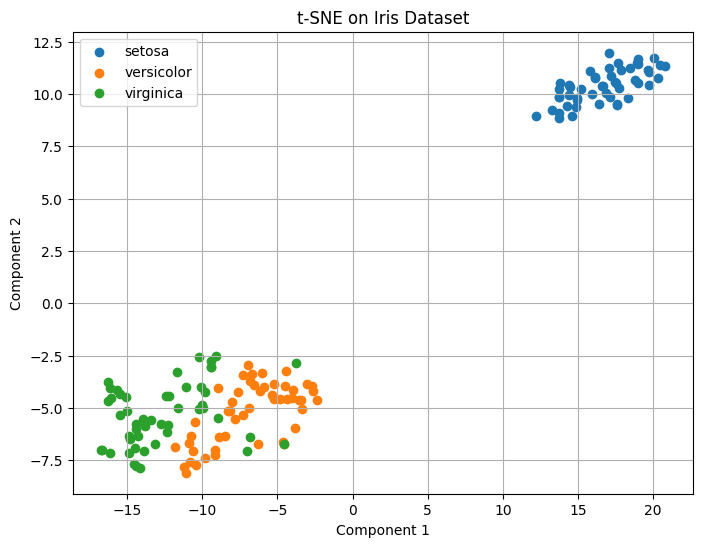

In [3]:
# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Visualize t-SNE result
plt.figure(figsize=(8,6))
for i, name in enumerate(target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=name)
plt.title('t-SNE on Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()


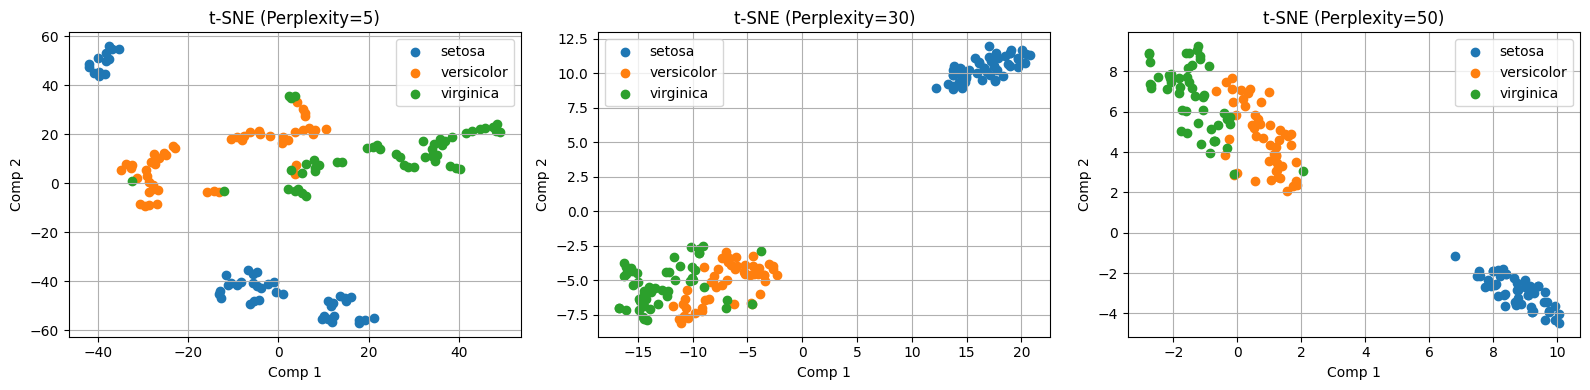

In [4]:
perplexities = [5, 30, 50]

plt.figure(figsize=(16, 4))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X_std)

    plt.subplot(1, 3, i+1)
    for j, name in enumerate(target_names):
        plt.scatter(X_tsne[y == j, 0], X_tsne[y == j, 1], label=name)
    plt.title(f't-SNE (Perplexity={perplexity})')
    plt.xlabel('Comp 1')
    plt.ylabel('Comp 2')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


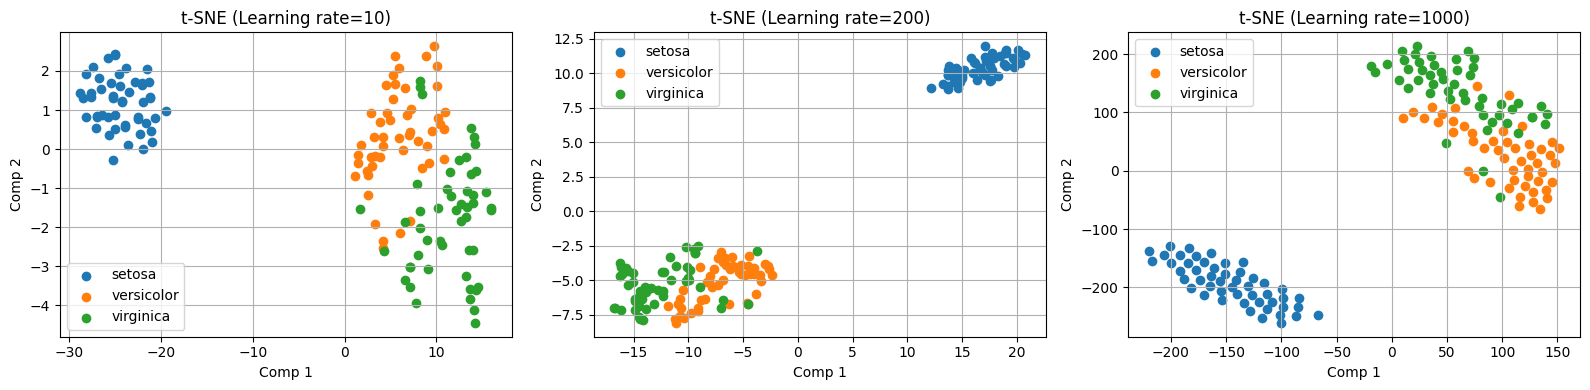

In [5]:
learning_rates = [10, 200, 1000]

plt.figure(figsize=(16, 4))

for i, lr in enumerate(learning_rates):
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=lr, random_state=42)
    X_tsne = tsne.fit_transform(X_std)

    plt.subplot(1, 3, i+1)
    for j, name in enumerate(target_names):
        plt.scatter(X_tsne[y == j, 0], X_tsne[y == j, 1], label=name)
    plt.title(f't-SNE (Learning rate={lr})')
    plt.xlabel('Comp 1')
    plt.ylabel('Comp 2')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### 📝 Observations from Parameter Tuning:

- **Perplexity**: Controls balance between local and global aspects of data.
  - Low values (5) focus too much on local relationships (can look noisy).
  - Higher values (50) try to consider global structure but might oversimplify.

- **Learning Rate**:
  - Very low (10): Poor convergence, scattered points.
  - Very high (1000): Might cause unstable embeddings.
  - **Moderate (200)** is usually a good starting point.
